<a href="https://colab.research.google.com/github/wang201156/ycps0218/blob/main/EX03_05_%E5%8F%B0%E7%81%A3%E8%82%A1%E7%A5%A8%E5%B8%82%E5%A0%B4%E5%80%8B%E8%82%A1%E6%AF%8F%E6%97%A5%E6%88%90%E4%BA%A4%E8%B3%87%E8%A8%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
def get_data(date,stock_no):
  url=f"https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}&response=html"
  df=pd.read_html(url,header=1)[0]
  return df

In [27]:
data_list=[]
for month in range(4,13):
  data_list.append(f"2024{month:02}15")
  df=pd.concat([df, get_data(f"2024{month:02}15","0050")], ignore_index=True  )
  df.to_csv(f"2024{month:02}15.csv",index=False)
for month in range(1,5):
  data_list.append(f"2025{month:02}15")
  df=pd.concat([df, get_data(f"2025{month:02}15","0050")], ignore_index=True  )
  df.to_csv(f"2025{month:02}15.csv",index=False)
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,114/04/01,13028846,2284423833,173.60,176.55,173.60,176.30,3.55,30395
1,114/04/02,11506862,2032740660,176.85,177.35,176.00,176.00,-0.3,25430
2,114/04/07,29578872,4685331802,158.40,158.40,158.40,158.40,-17.6,110835
3,114/04/08,88850426,13617537740,151.20,157.45,150.55,153.25,-5.15,155906
4,114/04/09,83829139,12545864892,152.50,154.15,145.00,146.20,-7.05,167496
...,...,...,...,...,...,...,...,...,...
450,114/04/16,27131302,4408343222,163.80,163.80,161.40,162.35,-3.0,64314
451,114/04/17,20055649,3217845954,161.30,161.30,159.45,160.55,-1.8,41908
452,114/04/18,11985828,1932161023,161.40,161.80,160.60,160.90,0.35,28258
453,114/04/21,17835479,2837544386,160.75,160.75,158.50,158.60,-2.3,52059


In [ ]:
#years=[2024,2025]
#data_list=[]
#for i in range (3,16)
  #mth=i%12+1
  #year=years[i//12]
  #data_list.append(f"{year}{mth:02}01")

#date_range=pd.date_range(start="2024-04-01",end="2025-04-01"freq="MS")
#data_list=date_range.strtime("%Y%m%d").to_list()

In [13]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

--2025-04-22 06:44:39--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.167.139, 142.251.167.113, 142.251.167.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-22 06:44:39--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  91.1MB/s    in 0.2s    

2025-04-22 06:44:4

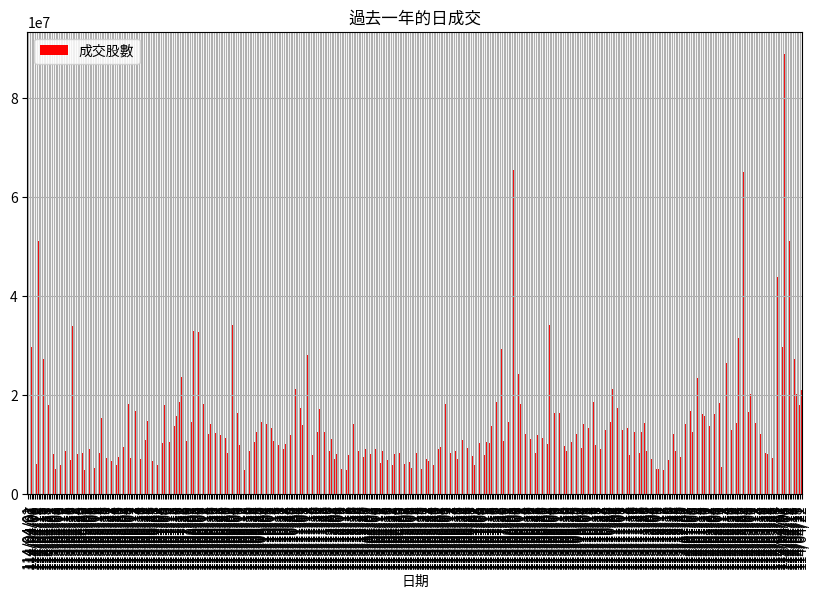

In [28]:
df.plot(kind='bar', x='日期', y='成交股數', title='過去一年的日成交', grid=True, color='red', figsize=(10, 6))
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

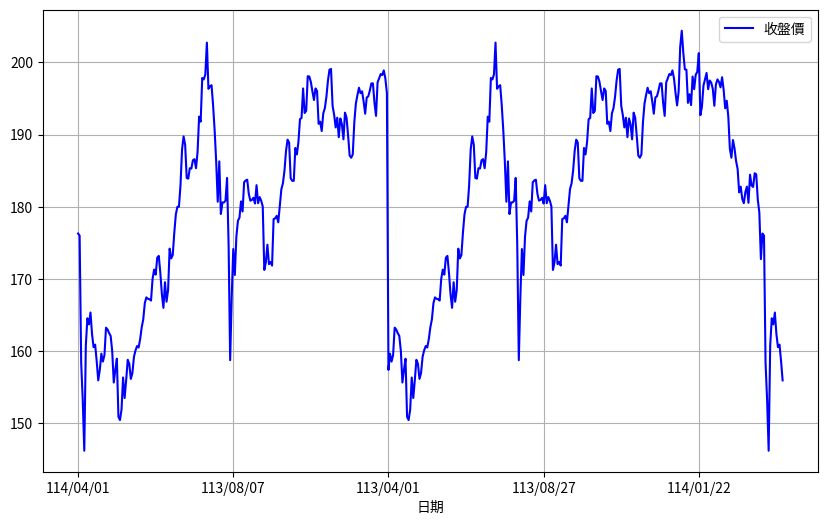

In [29]:
df.plot(kind='line', x='日期', y='收盤價', grid=True, color='blue', figsize=(10, 6))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

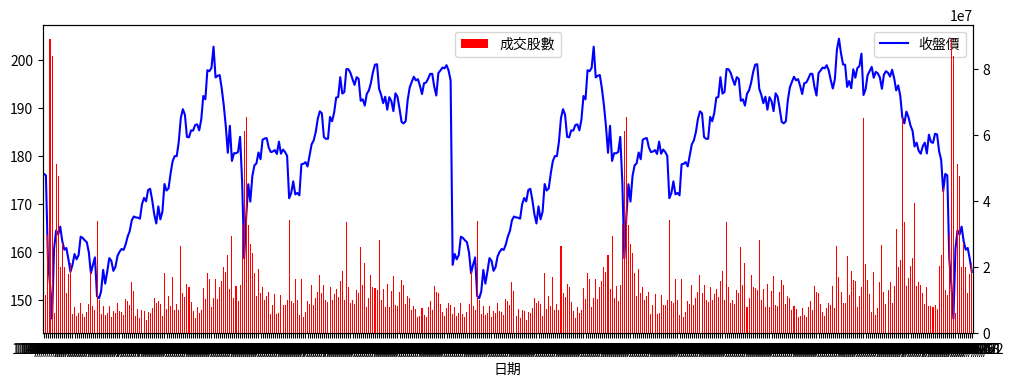

In [45]:
fig, ax1 = plt.subplots(figsize=(12,4))

df.plot(kind='line', x='日期', y='收盤價', ax=ax1, color='blue')

ax2 = ax1.twinx()
df.plot(kind='bar', x='日期', y='成交股數', ax=ax2, color="red")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

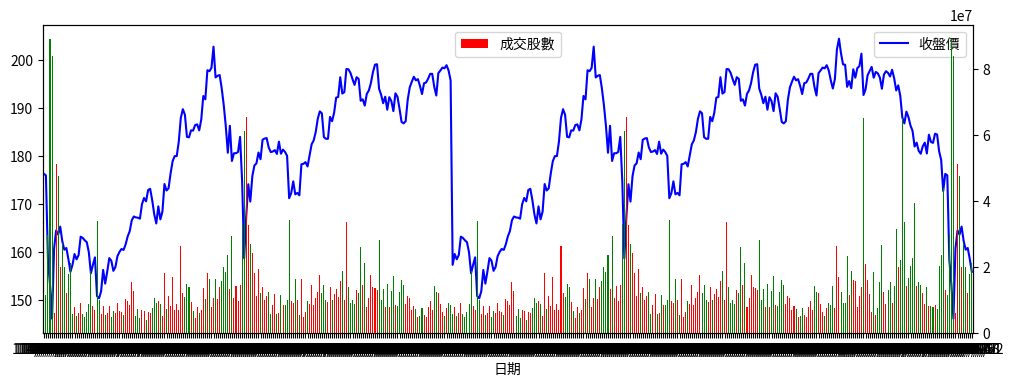

In [47]:
df["漲跌價差"]=pd.to_numeric(df["漲跌價差"],errors="coerce")
df["color"]=df["漲跌價差"].apply(lambda x:"green" if x<0 else "red")

fig, ax1 = plt.subplots(figsize=(12,4))
df.plot(kind='line', x='日期', y='收盤價', ax=ax1, color='blue')
ax2 = ax1.twinx()
df.plot(kind='bar', x='日期', y='成交股數', ax=ax2, color=df["color"])

plt.show